In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Importando a base de dados
dados = pd.read_csv('acidentes_transito.csv', sep=';')

In [41]:
# Visualização inicial, exploratória (5 primeiros dados)
dados.head()

,estado,populacao,frota total,frota ativa,acidentes,obitos
0,PR,11580049,8084044,5135876,300203,2722
1,SC,7340302,5517191,4120320,432803,3055
2,RS,11448796,7430665,4607893,4726,5216
3,SP,46659731,30514321,18467063,484056,18421
4,MG,21362542,12046067,8189877,958038,8312


In [42]:
# Verificar se há dados faltantes
dados.isna().sum()

estado         0
populacao      0
frota total    0
frota ativa    0
acidentes      0
obitos         0
dtype: int64

In [43]:
# Calcular o número de acidentes/dia (Brasil)
acid_dia = dados['acidentes'].sum() // 365
acid_dia

8741

In [44]:
# Calcular o total de óbitos
obitos = dados['obitos'].sum()
obitos

85295

In [45]:
# Calcular óbitos/dia
obitos_dia = obitos // 365
print(obitos_dia)

233


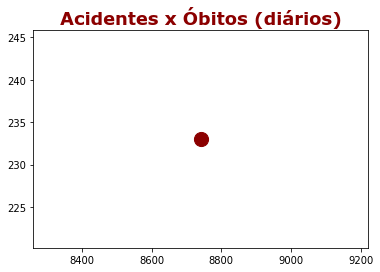

In [46]:
x = (acid_dia)
y = (obitos_dia)

plt.title('Acidentes x Óbitos (diários)', fontdict={'size': 18, 'color':'darkred', 'family': 'verdana', 'weight': 'bold'})
plt.scatter(x, y, color='darkred', s=200)
plt.show()

In [47]:
# Mostrando colunas estado, acidentes e óbitos, ordenando do maior nro de óbitos para o menor
dados[['estado', 'acidentes', 'obitos']].sort_values(by='obitos', ascending=False)

,estado,acidentes,obitos
3,SP,484056,18421
4,MG,958038,8312
19,BA,63709,7210
7,RJ,66342,5822
24,PE,53784,5561
2,RS,4726,5216
8,GO,332649,3959
15,PA,84551,3947
21,CE,52313,3123
1,SC,432803,3055


In [48]:
# Visualizando os 5 primeiros dados ordenados do maior número de óbitos para o menor
data_obitos = dados[['estado', 'acidentes', 'obitos']].sort_values(by='obitos', ascending=False).head()
data_obitos

,estado,acidentes,obitos
3,SP,484056,18421
4,MG,958038,8312
19,BA,63709,7210
7,RJ,66342,5822
24,PE,53784,5561


In [60]:
# Criando nova coluna(relação óbitos/acidentes)
data_obitos['%obitos'] = (data_obitos['obitos'] / data_obitos['acidentes'])
data_obitos

,estado,acidentes,obitos,%obitos
3,SP,484056,18421,0.038056
4,MG,958038,8312,0.008676
19,BA,63709,7210,0.113171
7,RJ,66342,5822,0.087757
24,PE,53784,5561,0.103395


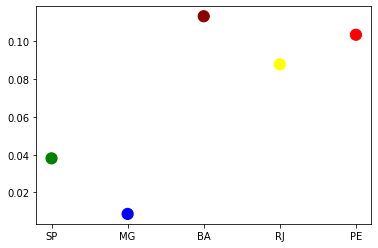

In [73]:
# GRÁFICO DE DISPERSÃO COM %ÓBITOS POR ESTADO
cores = np.array(["green","blue","darkred","yellow","red"])
x = data_obitos['estado']
y = data_obitos['%obitos']
plt.scatter(x, y, s=125, c=cores)
plt.show()

### Analizando os dados "data_obitos":
1. O estado de MG tem o maior número de acidentes, mas a porcentagem de óbito é a menor dos 5 estados listados. Isso mostra que o maior número de acidentes não tem relação direta com porcentagem de óbitos.
2. Podemos concluir também que o estado da BA, apesar de ser o segundo estado com menor número de acidentes, teve mais porcentagem de óbitos. Ou seja, teve mais acidentes do tipo gravíssimo (com mortes) do que os outros 4 estados listados.